In [ ]:
import torch
from torch import nn

In [ ]:
import torch
device ="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
    print(f"{image_path} directory already exists")
else:
    print(f"Creating {image_path} directory")

    image_path.mkdir(parents=True, exist_ok=True)


    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:

        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/refs/heads/main/data/pizza_steak_sushi.zip")

        print ("downloading pizza, steak, sushi data")
        f.write(request.content)

        with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
            print("unzipping pizza, steak, sushi data")
            zip_ref.extractall(image_path)

data/pizza_steak_sushi directory already exists


In [ ]:
data_path / "pizza_steak_sushi.zip"

PosixPath('data/pizza_steak_sushi.zip')

In [ ]:
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.


In [ ]:
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

data/pizza_steak_sushi/test/sushi/2394442.jpg
2394442
random image path: data/pizza_steak_sushi/test/sushi/2394442.jpg
Image class: 2394442
Image height: 408
Image width: 512


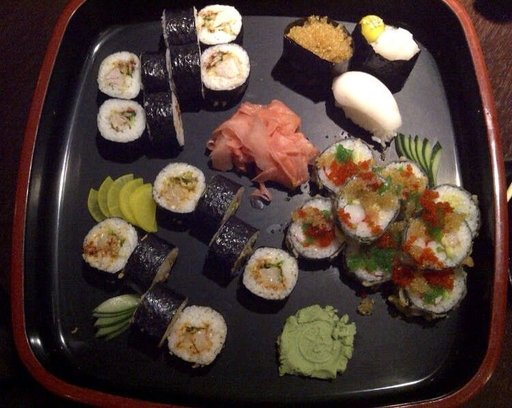

In [ ]:
import random
from PIL import Image

#random.seed(42)
image_path_list = list (image_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_path_list)
print (random_image_path)

image_class = random_image_path.stem
print(image_class)

img = Image.open(random_image_path)
print(f"random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

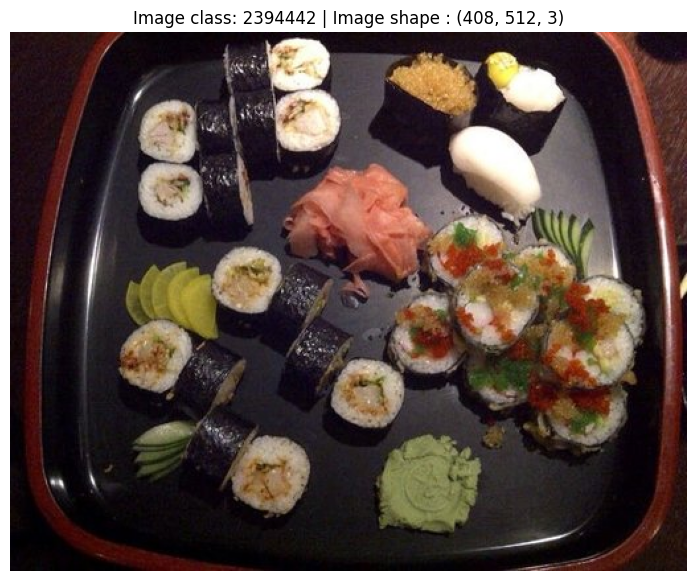

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

img_as_array = np.asarray (img)
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape : {img_as_array.shape}")
plt.axis(False);

array([[[33, 13, 15],
        [30, 10, 12],
        [30, 10, 12],
        ...,
        [23, 14, 19],
        [21, 12, 17],
        [20, 11, 16]],

       [[35, 15, 17],
        [32, 12, 14],
        [31, 11, 13],
        ...,
        [21, 12, 17],
        [19, 10, 15],
        [19, 10, 15]],

       [[34, 15, 17],
        [31, 12, 14],
        [30, 11, 13],
        ...,
        [19,  9, 17],
        [18,  8, 16],
        [18,  8, 16]],

       ...,

       [[11,  6, 12],
        [11,  6, 12],
        [11,  6, 12],
        ...,
        [33, 19, 18],
        [33, 19, 19],
        [31, 17, 17]],

       [[ 8,  3,  9],
        [ 9,  4, 10],
        [ 9,  4, 10],
        ...,
        [36, 21, 18],
        [32, 16, 16],
        [27, 11, 11]],

       [[ 4,  0,  5],
        [ 5,  0,  6],
        [ 6,  1,  7],
        ...,
        [36, 21, 18],
        [32, 16, 16],
        [25,  9,  9]]], dtype=uint8)
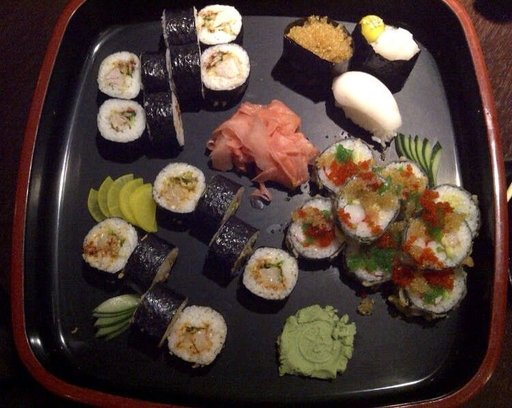

In [ ]:
img_as_array

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
data_transform = transforms.Compose ([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])



In [ ]:
data_transform(img)

tensor([[[0.0824, 0.0824, 0.0863,  ..., 0.1412, 0.1373, 0.1294],
         [0.0902, 0.0902, 0.0902,  ..., 0.1412, 0.1373, 0.1255],
         [0.1137, 0.0980, 0.1059,  ..., 0.1333, 0.1412, 0.1294],
         ...,
         [0.1412, 0.1373, 0.1294,  ..., 0.0157, 0.0196, 0.0157],
         [0.1333, 0.1373, 0.1255,  ..., 0.0275, 0.0275, 0.0275],
         [0.1255, 0.1294, 0.1137,  ..., 0.0275, 0.0314, 0.0314]],

        [[0.0431, 0.0431, 0.0392,  ..., 0.0667, 0.0588, 0.0588],
         [0.0353, 0.0431, 0.0392,  ..., 0.0667, 0.0549, 0.0588],
         [0.0392, 0.0471, 0.0471,  ..., 0.0627, 0.0627, 0.0510],
         ...,
         [0.0667, 0.0667, 0.0667,  ..., 0.0078, 0.0078, 0.0039],
         [0.0667, 0.0706, 0.0706,  ..., 0.0118, 0.0118, 0.0118],
         [0.0667, 0.0667, 0.0667,  ..., 0.0196, 0.0157, 0.0118]],

        [[0.0745, 0.0706, 0.0706,  ..., 0.0667, 0.0667, 0.0667],
         [0.0863, 0.0902, 0.0941,  ..., 0.0863, 0.0784, 0.0784],
         [0.1137, 0.1059, 0.0941,  ..., 0.0941, 0.0863, 0.

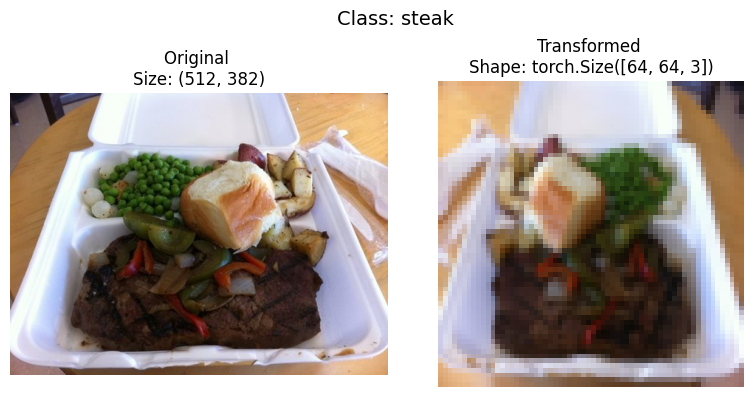

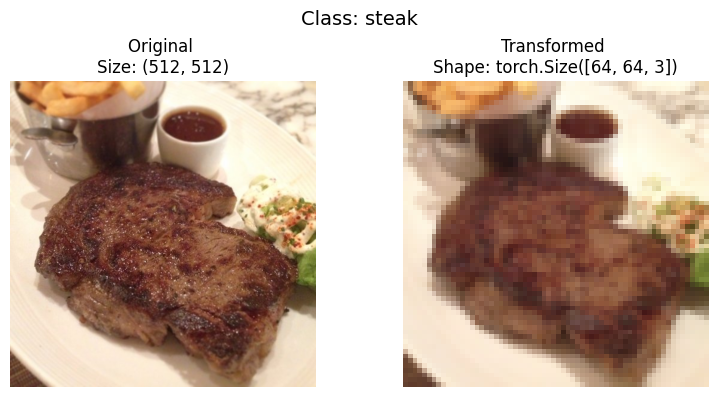

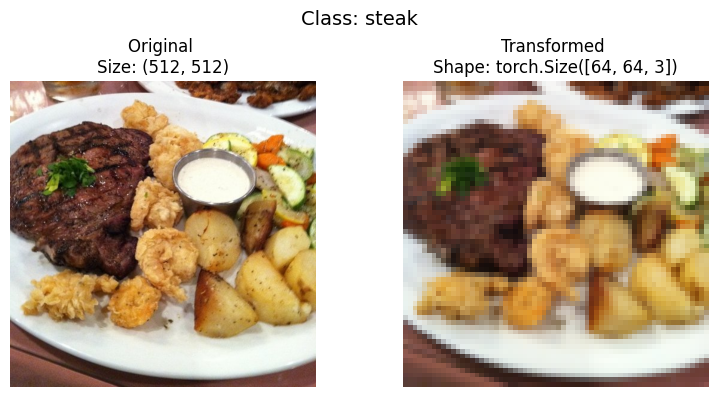

In [ ]:
import random
from PIL import Image
import matplotlib.pyplot as plt

def plot_transformed_images(image_paths, transforms, n=3, seed=None):
    if seed:
        random.seed(seed)

    random_image_paths = random.sample(image_paths, k=n)

    for image_path in random_image_paths:
        with Image.open(image_path) as img:
            fig, ax = plt.subplots(1, 2, figsize=(8, 4))

            # Original
            ax[0].imshow(img)
            ax[0].set_title(f"Original \nSize: {img.size}")
            ax[0].axis("off")

            # Transformed
            transformed_image = transforms(img).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nShape: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=14)
            plt.tight_layout()
            plt.show()

# ✅ Call this AFTER the function definition
plot_transformed_images(image_path_list, data_transform, n=3, seed=None)


In [ ]:
from torchvision import datasets
train_data= datasets.ImageFolder(root=train_dir, transform=data_transform, target_transform=None)
test_data= datasets.ImageFolder(root=test_dir, transform=data_transform, target_transform=None)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [ ]:
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [ ]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [ ]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
len(train_data), len(test_data)

(225, 75)

In [ ]:
train_data.samples[0]

('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [ ]:
# Get first image and label from training data
img, label = train_data[0]

# Print image tensor and its properties
print(f"Image tensor:\n{img}")
print(f"Image shape:\n{img.shape}")
print(f"Image datatype:\n{img.dtype}")

# Print label and its datatype
print(f"Image label:\n{label}")
print(f"Label datatype:\n{type(label)}")


Image tensor:
tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.01

Original shape: torch.Size([3, 64, 64])
Permuted shape: torch.Size([64, 64, 3])


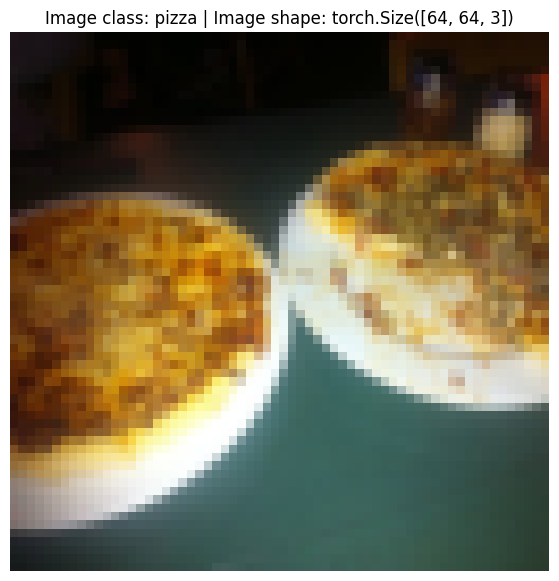

In [ ]:
img_permute = img.permute(1, 2, 0)  # Corrected 'permute'

print(f"Original shape: {img.shape}")
print(f"Permuted shape: {img_permute.shape}")

plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.title(f"Image class: {class_names[label]} | Image shape: {img_permute.shape}")
plt.axis(False)
plt.show()


In [ ]:
from torch.utils.data import DataLoader  # D should be uppercase

BATCH_SIZE = 1

train_dataloader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, num_workers=1, shuffle=True)
test_dataloader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, num_workers=1, shuffle=False)

train_dataloader, test_dataloader


(<torch.utils.data.dataloader.DataLoader at 0x7ecf9462ab10>,
 <torch.utils.data.dataloader.DataLoader at 0x7ecf9415f3d0>)

In [ ]:
len(train_dataloader), len(test_dataloader)

(225, 75)

In [ ]:
len(train_data), len(test_data)

(225, 75)

In [ ]:
img, label = next(iter(train_dataloader))
print(f"image shape : {img.shape}")
print(f"label shape : {label.shape}")

image shape : torch.Size([1, 3, 64, 64])
label shape : torch.Size([1])


In [ ]:
import os
import pathlib
from PIL import Image
from torch.utils.data import Dataset
from typing import Tuple, List, Dict
import torch

# Helper function
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
    class_to_idx = {class_name: idx for idx, class_name in enumerate(classes)}
    return classes, class_to_idx

# Custom dataset class
class ImageFolderCustom(Dataset):
    def __init__(self, target_dir: str, transform=None):
        self.paths = list(pathlib.Path(target_dir).glob("*/*.jpg"))
        self.transform = transform
        self.classes, self.class_to_idx = find_classes(target_dir)

    def load_image(self, index: int) -> Image.Image:
        image_path = self.paths[index]
        return Image.open(image_path).convert("RGB")

    def __len__(self):
        return len(self.paths)

    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        image = self.load_image(index)
        class_name = self.paths[index].parent.name
        label = self.class_to_idx[class_name]

        if self.transform:
            image = self.transform(image)

        return image, label


In [ ]:
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [ ]:
target_directory = train_dir
print (f"target directory : {target_directory}")

class_name_found = sorted([entry.name for entry in os.scandir(target_directory) ])
class_name_found

target directory : data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [ ]:
from typing import List, Tuple, Dict
import os

def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
    if not classes:
      raise FileNotFoundError(f"Couldn't find any classes in {directory}... please check false structure")
    class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
    return classes, class_to_idx


In [ ]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [ ]:
import os
import pathlib
from PIL import Image
from typing import Tuple, List, Dict
import torch
from torch.utils.data import Dataset

def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
    class_to_idx = {class_name: idx for idx, class_name in enumerate(classes)}
    return classes, class_to_idx

class ImageFolderCustom(Dataset):
    def __init__(self, target_dir: str, transform=None):
        self.paths = list(pathlib.Path(target_dir).glob("*/*.jpg"))
        self.transform = transform
        self.classes, self.class_to_idx = find_classes(target_dir)

    def load_image(self, index: int) -> Image.Image:
        image_path = self.paths[index]
        return Image.open(image_path).convert("RGB")

    def __len__(self):
        return len(self.paths)

    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        image = self.load_image(index)
        class_name = self.paths[index].parent.name
        class_idx = self.class_to_idx[class_name]

        if self.transform:
           return self.transform(img), class_idx
        else:
            return img, class_idx

In [ ]:
img, label

(tensor([[[[0.9529, 0.9608, 0.9608,  ..., 0.9255, 0.9490, 0.9686],
           [0.9529, 0.9569, 0.9608,  ..., 0.9255, 0.9255, 0.9333],
           [0.9529, 0.9529, 0.9529,  ..., 0.9294, 0.9294, 0.9216],
           ...,
           [0.8235, 0.8314, 0.8353,  ..., 0.8667, 0.8471, 0.7490],
           [0.8549, 0.8431, 0.8471,  ..., 0.8392, 0.7255, 0.6510],
           [0.8784, 0.8706, 0.8627,  ..., 0.7216, 0.6510, 0.6431]],
 
          [[0.8667, 0.8745, 0.8745,  ..., 0.8824, 0.9059, 0.9059],
           [0.8667, 0.8706, 0.8706,  ..., 0.8824, 0.8784, 0.8863],
           [0.8627, 0.8627, 0.8627,  ..., 0.8863, 0.8824, 0.8784],
           ...,
           [0.7020, 0.7137, 0.7176,  ..., 0.8078, 0.7922, 0.6706],
           [0.7333, 0.7176, 0.7255,  ..., 0.7843, 0.6471, 0.5451],
           [0.7647, 0.7529, 0.7451,  ..., 0.6431, 0.5451, 0.5294]],
 
          [[0.7137, 0.7216, 0.7294,  ..., 0.8627, 0.8745, 0.8314],
           [0.7137, 0.7176, 0.7255,  ..., 0.8549, 0.8510, 0.8627],
           [0.7137, 0.71

In [ ]:
from torchvision import transforms
train_transforms = transforms.Compose([
                                      transforms.Resize(size=(64,64)),
                                      transforms.RandomHorizontalFlip(p=0.5),
                                      transforms.ToTensor()]
)
test_transforms = transforms.Compose([
                                      transforms.Resize(size=(64,64)),
                                      transforms.ToTensor()]
)

In [ ]:
train_data_custom = ImageFolderCustom(target_dir=train_dir, transform=train_transforms)
test_data_custom = ImageFolderCustom(target_dir=test_dir, transform=test_transforms)

In [ ]:
from PIL import Image

def __getitem__(self, index):
    img, label = self.data[index]
    if isinstance(img, torch.Tensor):
        img = transforms.ToPILImage()(img)
    return self.transform(img), label


In [ ]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7ecf947b0c90>,
 <__main__.ImageFolderCustom at 0x7ecf947b0650>)

In [ ]:
train_data

Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )

In [ ]:
len(train_data_custom), len(test_data_custom)

(225, 75)

In [ ]:
len(test_data), len(test_data_custom)

(75, 75)

In [ ]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [ ]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
print(train_data_custom.classes==train_data.classes)
print(train_data_custom.classes==test_data.classes)

True
True


In [ ]:
import matplotlib.pyplot as plt
import random
from PIL import Image

def display_random_images(dataset, n=5, classes=None, seed=None):
    if seed:
        random.seed(seed)

    if n > 10:
        n = 10
        print("For display purposes, n is limited to 10.")

    random_indices = random.sample(range(len(dataset)), k=n)

    plt.figure(figsize=(16, 8))
    for i, idx in enumerate(random_indices):
        image_path = dataset.paths[idx]
        label = image_path.parent.name  # class name from folder

        # Load image using PIL
        image = Image.open(image_path).convert("RGB")

        # Plot image
        ax = plt.subplot(1, n, i + 1)
        plt.imshow(image)
        plt.axis("off")
        title = f"Class: {label}"
        ax.set_title(title, fontsize=10)
    plt.tight_layout()
    plt.show()


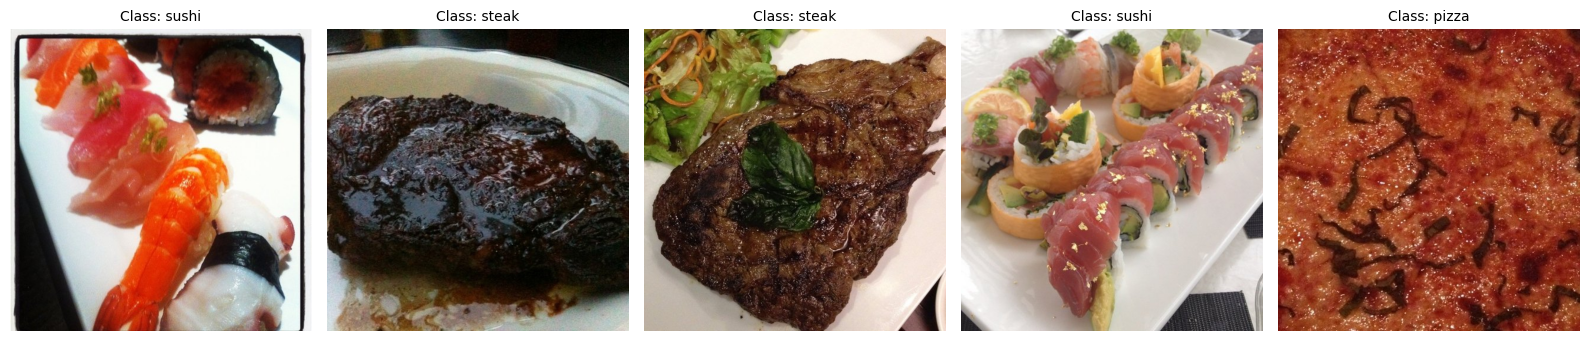

In [ ]:
display_random_images(train_data_custom, n=5, classes=class_names, seed=None)


In [ ]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
train_dataloader_custom = DataLoader(dataset=train_data_custom, batch_size=BATCH_SIZE, num_workers=NUM_WORKERS, shuffle=True)

test_dataloader_custom = DataLoader(dataset=test_data_custom, batch_size=BATCH_SIZE, num_workers=NUM_WORKERS, shuffle=False)


train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7ecf95874950>,
 <torch.utils.data.dataloader.DataLoader at 0x7ecf8ffa2190>)

In [ ]:
from torchvision import transforms
from PIL import Image

class ImageFolderCustom(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = Path(root_dir)
        self.transform = transform
        self.classes = sorted(entry.name for entry in self.root_dir.iterdir() if entry.is_dir())
        self.class_to_idx = {cls_name: idx for idx, cls_name in enumerate(self.classes)}

        self.paths = list(self.root_dir.glob("*/*.jpg")) + list(self.root_dir.glob("*/*.png"))

    def __len__(self):
        return len(self.paths)

    def __getitem__(self, idx):
        image_path = self.paths[idx]
        label_name = image_path.parent.name
        label = self.class_to_idx[label_name]

        image = Image.open(image_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, label  # <-- This must return a tuple of tensors (or transform should convert image to tensor)

from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),  # Converts to torch.Tensor
])

train_data_custom = ImageFolderCustom(target_directory, transform=transform)
train_dataloader_custom = DataLoader(train_data_custom, batch_size=32, shuffle=True)


In [ ]:
img_custom, label_custom = next(iter(train_dataloader_custom))
img_custom.shape, label_custom.shape


(torch.Size([32, 3, 224, 224]), torch.Size([32]))

In [ ]:
from torchvision import transforms
train_transform = transforms.Compose ([
                                      transforms.Resize(size=(224,224)),
                                       transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                       transforms.ToTensor()])
test_transform = transforms.Compose([transforms.Resize(size=(224,224)),
                                      transforms.ToTensor()])

test_transform = transforms.Compose([transforms.Resize(size=(224,224)),
                                      transforms.ToTensor()])




In [ ]:
image_path_list = list (image_path.glob("*/*/*.jpg"))
image_path_list [:10]

[PosixPath('data/pizza_steak_sushi/train/steak/2614649.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/231296.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/830007.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/214320.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2606444.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/560503.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/176508.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/1787505.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/1624747.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/735441.jpg')]

In [ ]:
import random
import matplotlib.pyplot as plt
from PIL import Image

def plot_transformed_images(image_paths, transform, n=3, seed=None):
    if seed:
        random.seed(seed)

    sample_paths = random.sample(image_paths, n)

    plt.figure(figsize=(15, 5))
    for i, path in enumerate(sample_paths):
        image = Image.open(path).convert("RGB")  # Open image using PIL
        transformed_image = transform(image)     # Apply transform

        # Convert tensor to numpy and permute dims for plotting
        image_np = transformed_image.permute(1, 2, 0).numpy()

        plt.subplot(1, n, i + 1)
        plt.imshow(image_np)
        plt.title(f"Transformed")
        plt.axis("off")

    plt.tight_layout()
    plt.show()


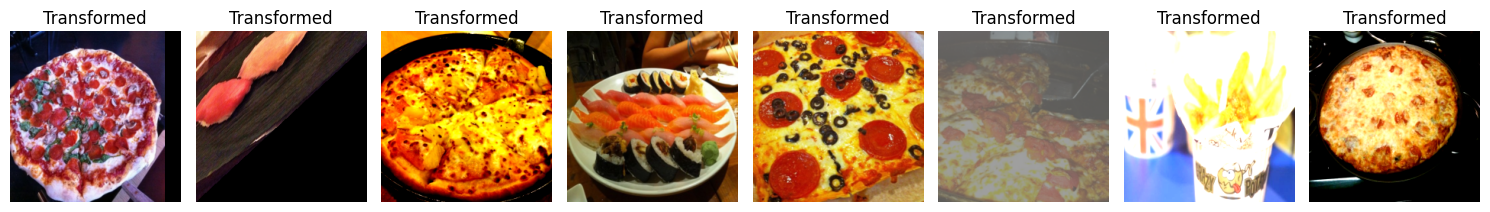

In [ ]:
plot_transformed_images(
    image_paths=image_path_list,  # List of image file paths
    transform=train_transform,
    n=8,
    seed=None
)


In [ ]:
from torchvision import transforms

simple_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])


In [ ]:
from torchvision import datasets
from torch.utils.data import DataLoader
import os

# Apply the transform to both train and test datasets
train_data_simple = datasets.ImageFolder(root=train_dir, transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir, transform=simple_transform)

# Parameters
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

# Create DataLoaders
train_dataloader = DataLoader(
    dataset=train_data_simple,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
    shuffle=True
)

test_dataloader = DataLoader(
    dataset=test_data_simple,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
    shuffle=False
)


In [ ]:
class TinyVGG(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape, image_size):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(input_shape, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        # Compute the flattened feature size dynamically
        with torch.no_grad():
            sample_input = torch.randn(1, input_shape, image_size, image_size)
            x = self.conv_block_1(sample_input)
            x = self.conv_block_2(x)
            flatten_dim = x.view(1, -1).shape[1]

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(flatten_dim, output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x


In [ ]:
torch.manual_seed(42)
device = "cuda" if torch.cuda.is_available() else "cpu"

model_0 = TinyVGG(input_shape=3, hidden_units=10, output_shape=len(class_names), image_size=64).to(device)



In [ ]:
from torch.utils.data import DataLoader

train_dataloader_simple = DataLoader(
    dataset=train_data,  # <-- matches your earlier variable
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
    shuffle=True
)

# Now this should work:
image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape, label_batch.shape


(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [ ]:
model_0(image_batch.to(device))

tensor([[ 0.0324, -0.0389,  0.0595],
        [ 0.0290, -0.0380,  0.0549],
        [ 0.0300, -0.0339,  0.0500],
        [ 0.0293, -0.0411,  0.0561],
        [ 0.0295, -0.0414,  0.0545],
        [ 0.0275, -0.0382,  0.0529],
        [ 0.0287, -0.0364,  0.0538],
        [ 0.0273, -0.0403,  0.0542],
        [ 0.0298, -0.0407,  0.0558],
        [ 0.0255, -0.0348,  0.0527],
        [ 0.0305, -0.0393,  0.0570],
        [ 0.0281, -0.0384,  0.0544],
        [ 0.0268, -0.0386,  0.0548],
        [ 0.0279, -0.0424,  0.0546],
        [ 0.0281, -0.0338,  0.0536],
        [ 0.0306, -0.0403,  0.0562],
        [ 0.0304, -0.0425,  0.0611],
        [ 0.0355, -0.0408,  0.0577],
        [ 0.0335, -0.0424,  0.0581],
        [ 0.0277, -0.0380,  0.0533],
        [ 0.0295, -0.0388,  0.0554],
        [ 0.0295, -0.0359,  0.0531],
        [ 0.0302, -0.0396,  0.0511],
        [ 0.0291, -0.0384,  0.0549],
        [ 0.0266, -0.0384,  0.0510],
        [ 0.0255, -0.0388,  0.0530],
        [ 0.0282, -0.0401,  0.0539],
 

In [ ]:
!pip install torchinfo


In [ ]:
import torchinfo
from torchinfo import summary

summary(model_0, input_size=(32, 3, 64, 64))


Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [32, 3]                   --
├─Sequential: 1-1                        [32, 10, 32, 32]          --
│    └─Conv2d: 2-1                       [32, 10, 64, 64]          280
│    └─ReLU: 2-2                         [32, 10, 64, 64]          --
│    └─Conv2d: 2-3                       [32, 10, 64, 64]          910
│    └─ReLU: 2-4                         [32, 10, 64, 64]          --
│    └─MaxPool2d: 2-5                    [32, 10, 32, 32]          --
├─Sequential: 1-2                        [32, 10, 16, 16]          --
│    └─Conv2d: 2-6                       [32, 10, 32, 32]          910
│    └─ReLU: 2-7                         [32, 10, 32, 32]          --
│    └─Conv2d: 2-8                       [32, 10, 32, 32]          910
│    └─ReLU: 2-9                         [32, 10, 32, 32]          --
│    └─MaxPool2d: 2-10                   [32, 10, 16, 16]          --
├─Sequentia

In [ ]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device=device):
  model.train()
  train_loss, train_acc = 0,0
  for batch, (x, y) in enumerate(dataloader):
    x, y = x.to(device), y.to(device)
    y_pred = model(X)
    loss = loss_fn(y_pred,y)
    train_loss +=loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    train_loss = train_loss / len (dataloader)
    train_acc = train_acc / len (dataloader)
    return train_loss, train_acc

In [ ]:
def test_step (model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               device=device):
  model.eval()
  test_loss, test_acc =0,0
  with torch.inference_mode():
    for batch, (x, y) in enumerate(dataloader):
      x, y = x.to(device), y.to(device)
      test_pred_logits = model(x)
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()
      test_pred_labels = test_pred_logits.argmax(dim=1)

      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
      test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [ ]:
from tqdm.auto import tqdm
import torch
from torch import nn

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
          device: torch.device = "cuda" if torch.cuda.is_available() else "cpu"):

    results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []}

    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer,
                                           device=device)

        test_loss, test_acc = test_step(model=model,
                                        dataloader=test_dataloader,
                                        loss_fn=loss_fn,
                                        device=device)

        print(f"Epoch: {epoch+1} | "
              f"train_loss: {train_loss:.4f} | train_acc: {train_acc:.4f} | "
              f"test_loss: {test_loss:.4f} | test_acc: {test_acc:.4f}")

        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    return results


In [ ]:
import torch
from torch import nn

class TinyVGG(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units * 16 * 16, out_features=output_shape)  # assumes 64x64 input
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x


In [ ]:
def train_step(model, dataloader, loss_fn, optimizer, device):
    model.train()
    train_loss, train_acc = 0, 0

    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Forward
        y_pred = model(X)

        # Loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # Accuracy
        y_pred_labels = y_pred.argmax(dim=1)
        train_acc += (y_pred_labels == y).sum().item() / len(y)

        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss /= len(dataloader)
    train_acc /= len(dataloader)

    return train_loss, train_acc


def test_step(model, dataloader, loss_fn, device):
    model.eval()
    test_loss, test_acc = 0, 0

    with torch.inference_mode():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)

            y_pred = model(X)
            loss = loss_fn(y_pred, y)
            test_loss += loss.item()

            y_pred_labels = y_pred.argmax(dim=1)
            test_acc += (y_pred_labels == y).sum().item() / len(y)

    test_loss /= len(dataloader)
    test_acc /= len(dataloader)

    return test_loss, test_acc


def train(model, train_dataloader, test_dataloader, optimizer, loss_fn, epochs, device):
    results = {"train_loss": [], "train_acc": [], "test_loss": [], "test_acc": []}

    for epoch in range(epochs):
        train_loss, train_acc = train_step(model, train_dataloader, loss_fn, optimizer, device)
        test_loss, test_acc = test_step(model, test_dataloader, loss_fn, device)

        print(f"Epoch {epoch+1}/{epochs}")
        print(f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f}")
        print(f"Test Loss: {test_loss:.4f}  | Test Acc: {test_acc:.4f}\n")

        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    return results


In [ ]:
import torch.nn as nn

class TinyVGG(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units * 16 * 16, out_features=output_shape)  # assumes input image is 32x32
        )

    def forward(self, x):
        x = self.conv_block(x)
        x = self.classifier(x)
        return x


In [ ]:
class TinyVGG(nn.Module):
    def __init__(self, input_channels: int, hidden_units: int, output_shape: int, image_size: int = 64):
        super().__init__()

        self.conv_block = nn.Sequential(
            nn.Conv2d(in_channels=input_channels, out_channels=hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        # Calculate flattened size after conv block using dummy input
        with torch.no_grad():
            dummy_input = torch.zeros(1, input_channels, image_size, image_size)
            out = self.conv_block(dummy_input)
            flattened_size = out.shape[1] * out.shape[2] * out.shape[3]

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=flattened_size, out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block(x)
        x = self.classifier(x)
        return x


In [ ]:
model_0 = TinyVGG(
    input_channels=3,
    hidden_units=HIDDEN_UNITS,
    output_shape=len(train_data.classes),
    image_size=64
).to(device)


In [ ]:
class TinyVGG(nn.Module):
    def __init__(self, input_channels: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block = nn.Sequential(
            nn.Conv2d(in_channels=input_channels, out_channels=hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units * 16 * 16, out_features=output_shape)  # assumes 32x32 input
        )

    def forward(self, x):
        x = self.conv_block(x)
        x = self.classifier(x)
        return x


In [ ]:
import torch
from torch import nn

class TinyVGG(nn.Module):
    def __init__(self, input_channels: int, hidden_units: int, output_shape: int, image_size: int = 64):
        super().__init__()

        self.conv_block = nn.Sequential(
            nn.Conv2d(in_channels=input_channels, out_channels=hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),

            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )

        # Dynamically determine flattened size
        with torch.no_grad():
            dummy_input = torch.zeros(1, input_channels, image_size, image_size)
            dummy_output = self.conv_block(dummy_input)
            flattened_size = dummy_output.view(1, -1).shape[1]

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(flattened_size, output_shape)
        )

    def forward(self, x):
        x = self.conv_block(x)
        x = self.classifier(x)
        return x


In [ ]:
model_0 = TinyVGG(
    input_channels=3,
    hidden_units=HIDDEN_UNITS,
    output_shape=len(train_data.classes),  # e.g., 3 for 3 classes
    image_size=64  # or 128, or whatever size your input images are
).to(device)


In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from timeit import default_timer as timer

# Set device
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Define TinyVGG
class TinyVGG(nn.Module):
    def __init__(self, input_channels: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block = nn.Sequential(
            nn.Conv2d(in_channels=input_channels, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units * 32 * 32, out_features=output_shape)
        )

    def forward(self, x):
        return self.classifier(self.conv_block(x))

# Image transforms
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

# Load dataset with fixed number of classes
NUM_CLASSES = 3
train_data = datasets.FakeData(transform=transform, size=1000, image_size=(3, 64, 64), num_classes=NUM_CLASSES)
test_data = datasets.FakeData(transform=transform, size=200, image_size=(3, 64, 64), num_classes=NUM_CLASSES)
train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=False)

# Define model
model = TinyVGG(
    input_channels=3,
    hidden_units=10,
    output_shape=NUM_CLASSES
).to(device)

# Loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
def train(model, train_dataloader, test_dataloader, optimizer, loss_fn, epochs, device):
    results = {"train_loss": [], "test_loss": [], "train_acc": [], "test_acc": []}

    for epoch in range(epochs):
        model.train()
        train_loss, train_correct = 0, 0

        for X, y in train_dataloader:
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss = loss_fn(y_pred, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            train_correct += (y_pred.argmax(1) == y).sum().item()

        train_loss /= len(train_dataloader)
        train_acc = train_correct / len(train_dataloader.dataset)

        model.eval()
        test_loss, test_correct = 0, 0
        with torch.inference_mode():
            for X, y in test_dataloader:
                X, y = X.to(device), y.to(device)
                y_pred = model(X)
                loss = loss_fn(y_pred, y)

                test_loss += loss.item()
                test_correct += (y_pred.argmax(1) == y).sum().item()

        test_loss /= len(test_dataloader)
        test_acc = test_correct / len(test_dataloader.dataset)

        results["train_loss"].append(train_loss)
        results["test_loss"].append(test_loss)
        results["train_acc"].append(train_acc)
        results["test_acc"].append(test_acc)

        print(f"Epoch {epoch+1}/{epochs}: "
              f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
              f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")

    return results

# Start training
start_time = timer()

model_results = train(
    model=model,
    train_dataloader=train_dataloader,
    test_dataloader=test_dataloader,
    optimizer=optimizer,
    loss_fn=loss_fn,
    epochs=5,
    device=device
)

end_time = timer()
print(f"\nTotal training time: {end_time - start_time:.3f} seconds")


Epoch 1/5: Train Loss: 1.1076, Train Acc: 0.3090 | Test Loss: 1.0934, Test Acc: 0.4100
Epoch 2/5: Train Loss: 1.0899, Train Acc: 0.4050 | Test Loss: 1.0633, Test Acc: 0.4450
Epoch 3/5: Train Loss: 1.0608, Train Acc: 0.4490 | Test Loss: 1.0154, Test Acc: 0.6250
Epoch 4/5: Train Loss: 0.9870, Train Acc: 0.5310 | Test Loss: 0.8896, Test Acc: 0.7150
Epoch 5/5: Train Loss: 0.8519, Train Acc: 0.7780 | Test Loss: 0.7138, Test Acc: 0.8850

Total training time: 39.651 seconds


In [ ]:
def plot_loss_curves(results):
    loss = results['train_loss']
    test_loss = results['test_loss']

    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    epochs = range(len(results['train_loss']))

    plt.figure(figsize=(15, 7))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()


    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

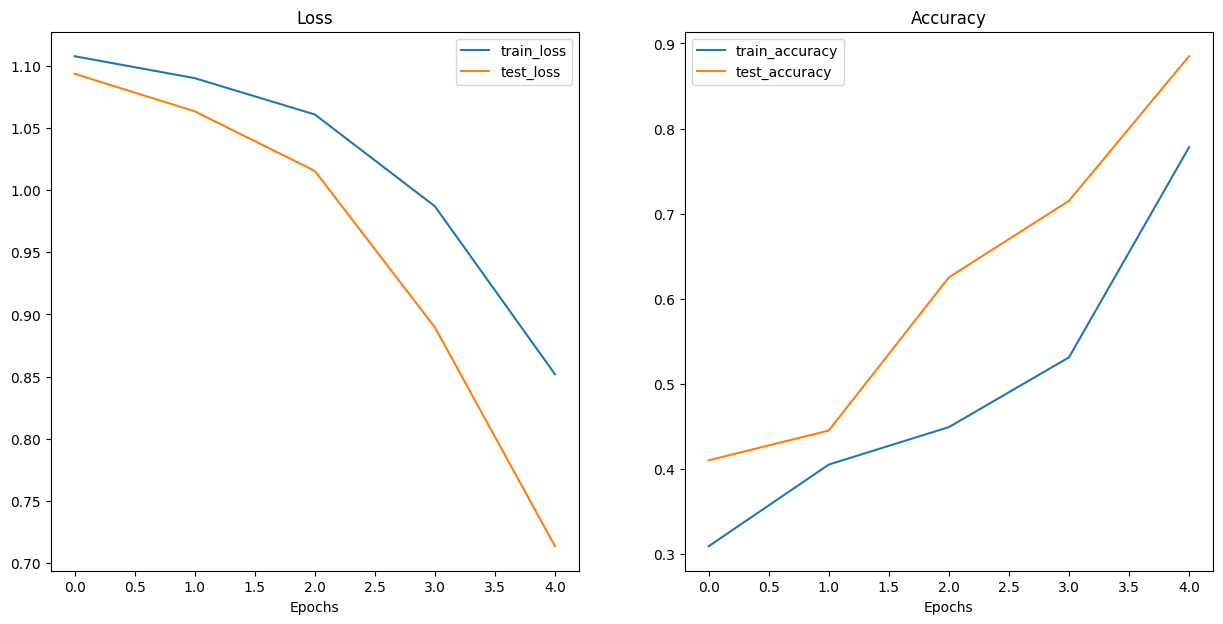

In [ ]:
plot_loss_curves(model_results)

In [ ]:
from torchvision import transforms

# Training transforms
train_transform_trivial = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

# Testing transforms (fixed typo: Compase -> Compose)
test_transform_simple = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])


In [ ]:
from torchvision import datasets
train_data_augmented = datasets.ImageFolder(root=train_dir, transform=train_transform_trivial)
test_data = datasets.ImageFolder(root=test_dir, transform=test_transform_simple)

In [ ]:
import os
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(dataset=train_data_augmented, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)

test_dataloader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)

In [ ]:
torch.manual_seed(42)

model_1 = TinyVGG(
    input_channels=3,                # ✅ Corrected from input_shape to input_channels
    hidden_units=10,
    output_shape=len(train_data_augmented.classes)
).to(device)

model_1


TinyVGG(
  (conv_block): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=10240, out_features=3, bias=True)
  )
)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 5


loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(),lr=0.001)

from timeit import default_timer as timer
start_time = timer()

model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS,
                        device=device)

end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

Epoch 1/5: Train Loss: 1.1138, Train Acc: 0.3333 | Test Loss: 1.0659, Test Acc: 0.4800
Epoch 2/5: Train Loss: 1.0562, Train Acc: 0.3822 | Test Loss: 1.1282, Test Acc: 0.3467
Epoch 3/5: Train Loss: 1.0212, Train Acc: 0.3867 | Test Loss: 1.1194, Test Acc: 0.4000
Epoch 4/5: Train Loss: 1.0052, Train Acc: 0.4667 | Test Loss: 1.1003, Test Acc: 0.4000
Epoch 5/5: Train Loss: 0.9543, Train Acc: 0.4844 | Test Loss: 1.0099, Test Acc: 0.4000
Total training time: 10.248 seconds


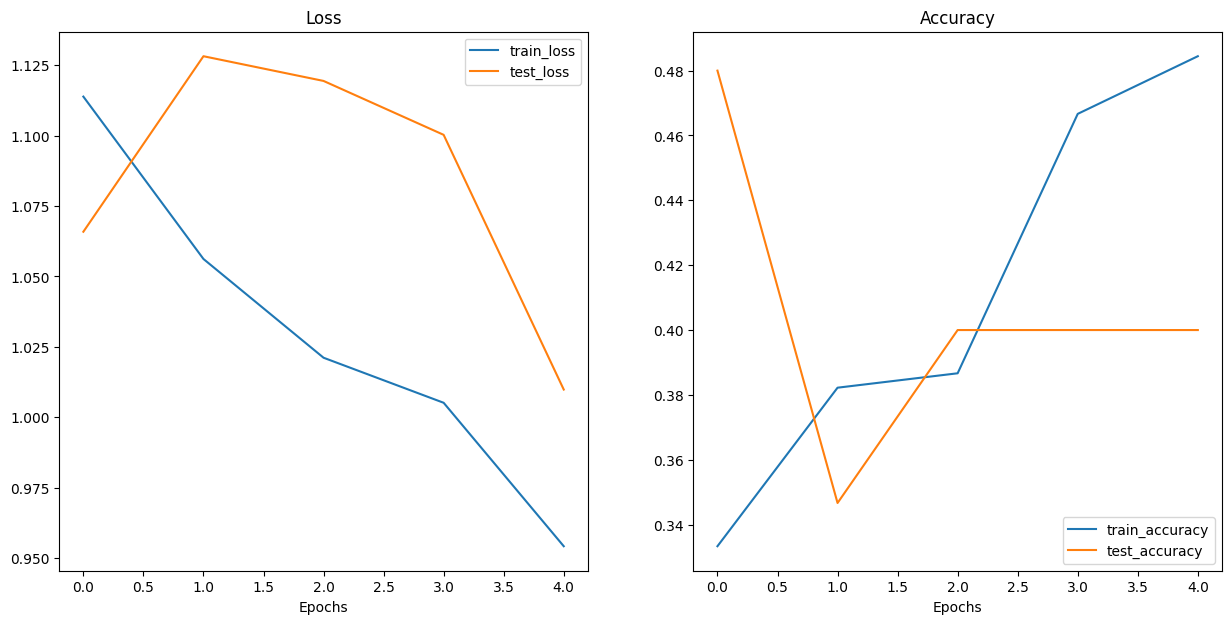

In [ ]:
plot_loss_curves(model_1_results)

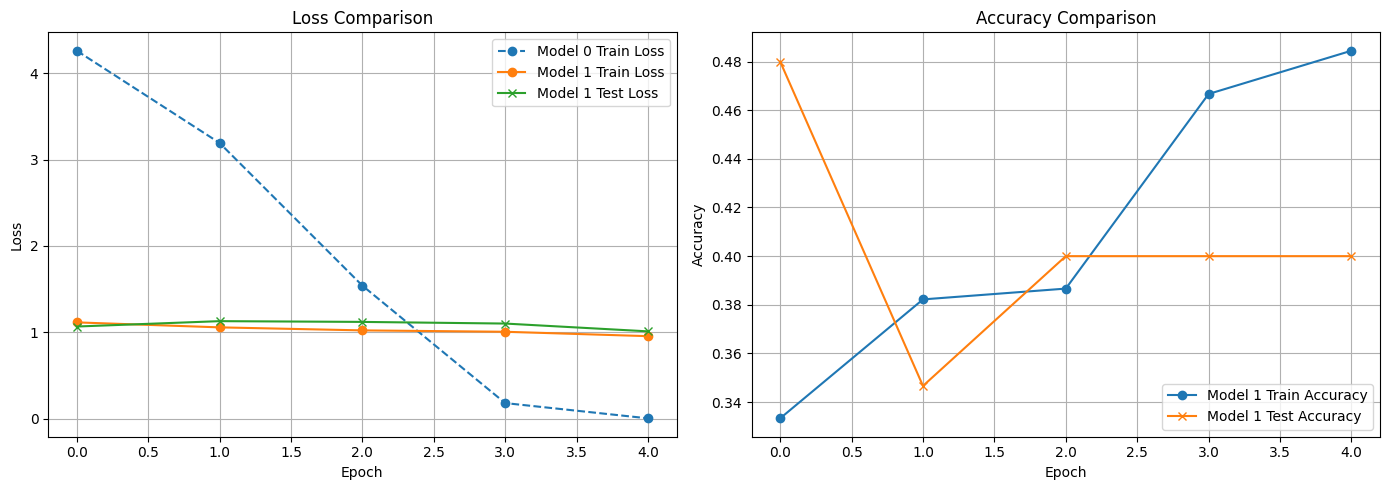

In [ ]:
import matplotlib.pyplot as plt

# Extract values
epochs_0 = range(len(model_0_results['train_loss']))
epochs_1 = range(len(model_1_results['train_loss']))

# Ensure test_loss for model_0 is not empty
if len(model_0_results['test_loss']) != len(model_0_results['train_loss']):
    print("Warning: model_0 test_loss length doesn't match train_loss, skipping model_0 test_loss plot.")
    model_0_test_loss = None
else:
    model_0_test_loss = model_0_results['test_loss']

# Plotting
plt.figure(figsize=(14, 5))

# --- LOSS ---
plt.subplot(1, 2, 1)
plt.title("Loss Comparison")
plt.plot(epochs_0, model_0_results['train_loss'], label="Model 0 Train Loss", linestyle='--', marker='o')
if model_0_test_loss:
    plt.plot(epochs_0, model_0_test_loss, label="Model 0 Test Loss", linestyle='--', marker='x')

plt.plot(epochs_1, model_1_results['train_loss'], label="Model 1 Train Loss", linestyle='-', marker='o')
plt.plot(epochs_1, model_1_results['test_loss'], label="Model 1 Test Loss", linestyle='-', marker='x')

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

# --- ACCURACY ---
plt.subplot(1, 2, 2)
plt.title("Accuracy Comparison")
plt.plot(epochs_1, model_1_results['train_acc'], label="Model 1 Train Accuracy", linestyle='-', marker='o')
plt.plot(epochs_1, model_1_results['test_acc'], label="Model 1 Test Accuracy", linestyle='-', marker='x')

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import requests
custom_image_path = data_path / "/content/istockphoto-1442417585-612x612.jpg"

if not custom_image_path.is_file():
   with open (custom_image_path, "wb") as f:
       request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/04-pizza-dad.jpeg")

       print (f"Downloading {custom_image_path}")

       image_bytes = request.content
       f.write(image_bytes)
else:
     print (f"{custom_image_path} already exists")

/content/istockphoto-1442417585-612x612.jpg already exists


In [ ]:
import torchvision
custom_image_uint8 = torchvision.io.read_image(custom_image_path)
print(f"custom_image_tensore: {custom_image_uint8}")
print(f"custom_image_uint8.shape: {custom_image_uint8.shape}")
print(f"custom_image_uint8.dtype: {custom_image_uint8.dtype}")

custom_image_tensore: tensor([[[ 1,  1,  1,  ..., 70, 69, 68],
         [ 1,  1,  1,  ..., 71, 70, 69],
         [ 1,  1,  1,  ..., 72, 71, 70],
         ...,
         [ 4,  4,  4,  ...,  0,  0,  0],
         [11, 10,  9,  ...,  0,  0,  0],
         [21, 20, 19,  ...,  0,  0,  0]],

        [[ 1,  1,  1,  ..., 43, 42, 41],
         [ 1,  1,  1,  ..., 44, 43, 42],
         [ 1,  1,  1,  ..., 45, 44, 43],
         ...,
         [ 0,  0,  0,  ...,  1,  1,  1],
         [ 6,  5,  4,  ...,  1,  1,  1],
         [12, 11, 10,  ...,  0,  0,  0]],

        [[ 1,  1,  1,  ..., 24, 23, 22],
         [ 1,  1,  1,  ..., 25, 24, 23],
         [ 1,  1,  1,  ..., 26, 25, 24],
         ...,
         [ 1,  1,  1,  ...,  0,  0,  0],
         [ 3,  2,  1,  ...,  0,  0,  0],
         [ 7,  6,  5,  ...,  2,  2,  2]]], dtype=torch.uint8)
custom_image_uint8.shape: torch.Size([3, 408, 612])
custom_image_uint8.dtype: torch.uint8


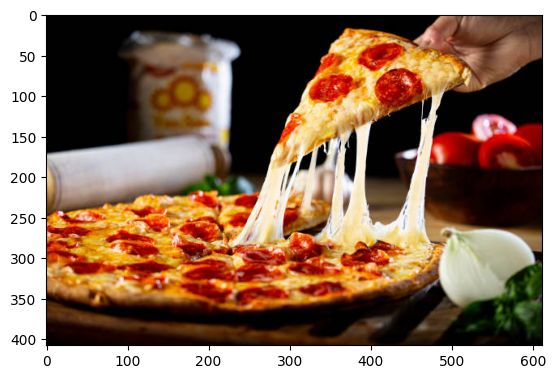

In [ ]:
plt.imshow(custom_image_uint8.permute(1, 2, 0))

In [ ]:
from torchvision import transforms
custom_image_transform = transforms.Compose([
    transforms.Resize((64, 64)),
])

custom_image_transformed = custom_image_transform(custom_image_uint8)
print(f"custom_image_transformed.shape: {custom_image_transformed.shape}")
print(f"custom_image_transformed.dtype: {custom_image_transformed.dtype}")

custom_image_transformed.shape: torch.Size([3, 64, 64])
custom_image_transformed.dtype: torch.uint8


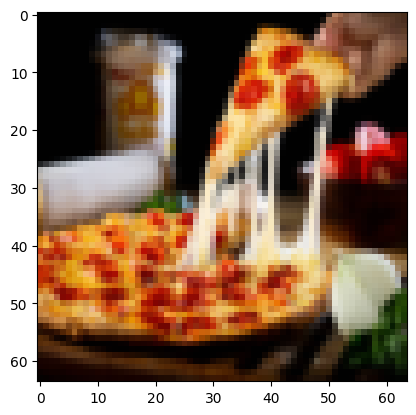

In [ ]:
plt.imshow(custom_image_transformed.permute(1, 2, 0))

In [ ]:
import torchvision.transforms as transforms
from PIL import Image

# Load the image
custom_image = Image.open(custom_image_path).convert("RGB")

# Define the same transform used for training
custom_transform = transforms.Compose([
    transforms.Resize((64, 64)),            # Resize to expected input size
    transforms.ToTensor(),                  # Convert to tensor (automatically scales 0-255 to 0-1)
    # If you normalized during training, apply same normalization here
    # transforms.Normalize(mean=[...], std=[...])
])

# Apply transform
custom_image_transformed = custom_transform(custom_image)

# Check shape
print(f"Transformed image shape: {custom_image_transformed.shape}")


Transformed image shape: torch.Size([3, 64, 64])


In [ ]:
# Set model to eval mode
model_1.eval()

# Run prediction
with torch.inference_mode():
    custom_image_pred = model_1(custom_image_transformed.unsqueeze(0).to(device))  # [1, 3, 64, 64]

# Get class prediction
predicted_class = torch.argmax(custom_image_pred, dim=1)

print(f"Raw prediction: {custom_image_pred}")
print(f"Predicted class index: {predicted_class.item()}")


Raw prediction: tensor([[ 0.1724, -1.4926, -0.0757]])
Predicted class index: 0


In [ ]:
class_names

['pizza', 'steak', 'sushi']

In [ ]:
custom_image_pres_probs = torch.softmax(custom_image_pred, dim=1)
custom_image_pres_probs

tensor([[0.5077, 0.0961, 0.3962]])

In [ ]:
custom_image_pred_labels = torch.argmax(custom_image_pres_probs, dim=1)
custom_image_pred_labels

tensor([0])

In [ ]:
class_names[custom_image_pred_labels]

'pizza'

In [ ]:
import torch
import torchvision
import matplotlib.pyplot as plt

def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: list[str] = None,
                        transform=None,
                        device='cpu'):
    # Read image
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32) / 255.

    # Apply transform if provided
    if transform:
        target_image = transform(target_image)

    # Move model to device
    model.to(device)
    model.eval()

    with torch.inference_mode():
        # Add batch dimension
        target_image = target_image.unsqueeze(0).to(device)

        # Prediction
        target_image_pred = model(target_image)
        target_image_pred_probs = torch.softmax(target_image_pred, dim=1)
        target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # Plot the image
    plt.imshow(target_image.squeeze().permute(1, 2, 0).cpu())

    if class_names:
        title = f"Pred: {class_names[target_image_pred_label.item()]} | Prob: {target_image_pred_probs.max().item():.3f}"
    else:
        title = f"Pred: {target_image_pred_label.item()} | Prob: {target_image_pred_probs.max().item():.3f}"

    plt.title(title)
    plt.axis('off')
    plt.show()


In [ ]:
from PIL import Image
import torchvision.transforms as transforms

def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: list[str] = None,
                        transform=None,
                        device=device):

    # Read image as tensor (0-255)
    target_image_tensor = torchvision.io.read_image(str(image_path)).type(torch.float32) / 255.

    # Convert from tensor to PIL image (CHW → HWC → PIL)
    target_image_pil = transforms.ToPILImage()(target_image_tensor)

    # Apply transform if provided
    if transform:
        target_image = transform(target_image_pil)
    else:
        target_image = target_image_tensor

    # Move model to device and set to eval
    model.to(device)
    model.eval()

    with torch.inference_mode():
        target_image = target_image.unsqueeze(0)  # Add batch dimension
        target_image_pred = model(target_image.to(device))
        target_image_pred_probs = torch.softmax(target_image_pred, dim=1)
        target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # Plot
    plt.imshow(target_image_tensor.permute(1, 2, 0))  # original image for visualization
    if class_names:
        title = f"Pred: {class_names[target_image_pred_label]} | Prob: {target_image_pred_probs.max():.3f}"
    else:
        title = f"Pred: {target_image_pred_label.item()} | Prob: {target_image_pred_probs.max():.3f}"

    plt.title(title)
    plt.axis('off')
    plt.show()


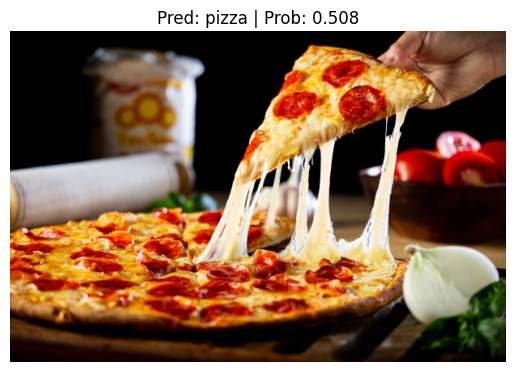

In [ ]:
pred_and_plot_image(model=model_1,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform=test_transform_simple,
                    device=device)